# Curve for different learning rate

This notebook display the evolution of the loss function of different methods.

## Import

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time as t

## Switcher

In [2]:
class CSV():
    def __init__(self):
        self.switch = {}
        self.list_name = []
        self.min = 10
    
    def set(self, name:str):
        nom = name.split('.')
        if nom[-1]=='csv':
            kappa = nom[0].split('/')[-1].split('_')
            word = kappa.pop()
            while word != 'binary' and word != 'ribbon':
                word = kappa.pop()
            kappa = '_'.join(kappa)
            self.switch[kappa] = pd.read_csv(name)
            self.list_name.append(kappa)
            search = list(pd.read_csv(name)['Value'])
            search.append(self.min)
            self.min = min(search)

## Reading

In [3]:
number = str(input("Please enter the folder you want to analyse : "))
path = os.path.join("/home/julien/traineeship/mmiv/curve/{}".format(number))
csv = CSV()
csv_name = os.listdir(path)

for name in csv_name:
    csv.set(os.path.join(path, name))

Please enter the folder you want to analyse :  ribbon_static


## Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


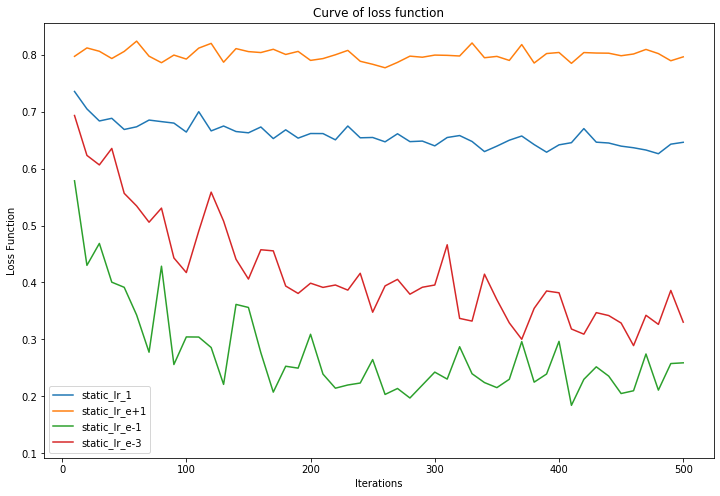

In [4]:
plt.figure(figsize=(12,8))
for lab in csv.list_name:
    plt.plot(csv.switch.get(lab)['Step'], csv.switch.get(lab)['Value'], label=lab)
plt.title("Curve of loss function")
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.legend()
plt.ylim(ymin=csv.min/2)
plt.savefig(os.path.join(path, "fig.eps"))

## Time graph

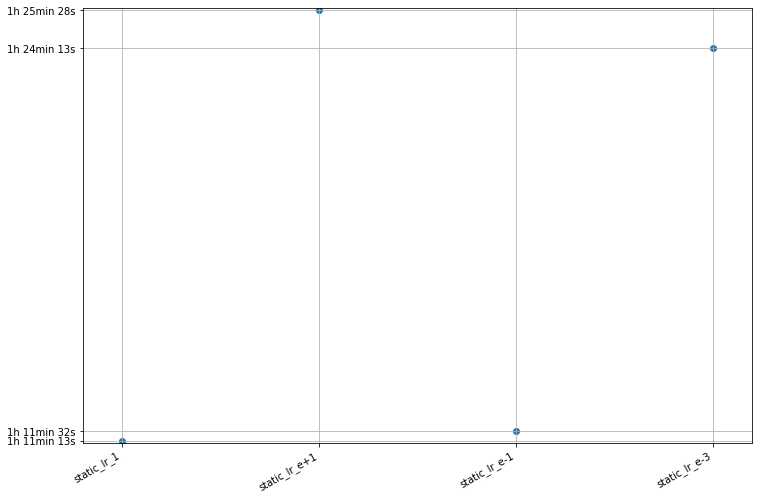

In [5]:
plt.figure(figsize=(12,8))
labels = []
time = []
for lab in csv.list_name:
    labels.append(lab)
    time.append(csv.switch.get(lab)['Wall time'][-1:].values[0]-csv.switch.get(lab)['Wall time'][0])
N = len(labels)
ind = np.linspace(0,(N-1)*0.1,N)
labels = np.array(labels)
hour = np.array([t.gmtime(x)[3:6] for x in time])
val = [x for x in time]
tick = [x for x in time]

n = len(time)
eps = int((max(time)-min(time))/50)+1

for i in range(n):
    for j in range(n):
        if abs(tick[i]-tick[j])<eps:
            tick[j] = tick[i]
            hour[j] = hour[i]

plt.yticks(tick, ['{}h {}min {}s'.format(x[0],x[1],x[2]) for x in hour])
plt.xticks(ind,labels,rotation=30,ha='right')
plt.scatter(ind, val)
plt.ylim(ymin=min(val)*0.999, ymax=max(val)*1.001)
plt.grid()
plt.savefig(os.path.join(path, 'time.eps'))

Please, enter the accuracy to attend:  0.2


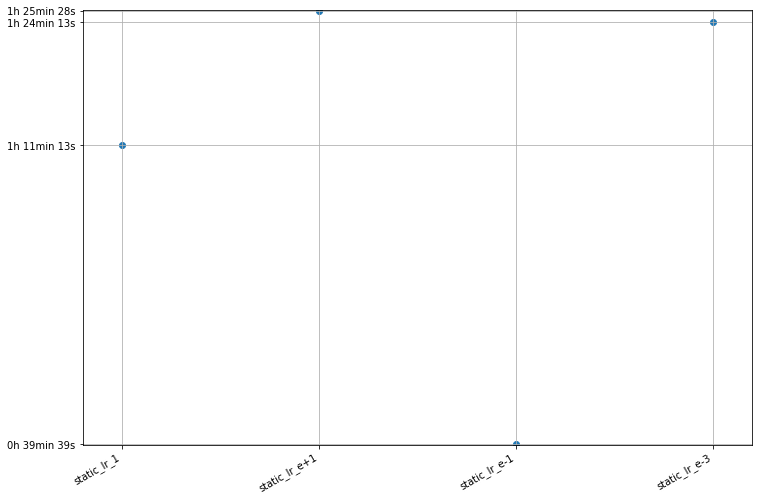

In [6]:
level = eval(input("Please, enter the accuracy to attend: "))
plt.figure(figsize=(12,8))
labels = []
time = []
for lab in csv.list_name:
    labels.append(lab)
    cpt = 0
    value = csv.switch.get(lab)['Value']
    M = len(value)
    while cpt < M-1 and value[cpt] > level:
        cpt+=1
    time.append(csv.switch.get(lab)['Wall time'][cpt]-csv.switch.get(lab)['Wall time'][0])
N = len(labels)
ind = np.linspace(0,(N-1)*0.1,N)
labels = np.array(labels)
hour = np.array([t.gmtime(x)[3:6] for x in time])
val = [x for x in time]
tick = [x for x in time]

n = len(time)
eps = int((max(time)-min(time))/50)+1

for i in range(n):
    for j in range(n):
        if abs(tick[i]-tick[j])<eps:
            tick[j] = tick[i]
            hour[j] = hour[i]

plt.yticks(tick, ['{}h {}min {}s'.format(x[0],x[1],x[2]) for x in hour])
plt.xticks(ind,labels,rotation=30,ha='right')
plt.scatter(ind, val)
plt.ylim(ymin=min(val)*0.999, ymax=max(val)*1.001)
plt.grid()
plt.savefig(os.path.join(path, 'spec.eps'))